In [149]:
import numpy as np
import pandas as pd

In [150]:
df = pd.read_csv('data_HMM.csv')
df.head()

,Hidden,Visible
0,S,0
1,S,1
2,S,2
3,S,2
4,S,2


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Hidden   500 non-null    object
 1   Visible  500 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [152]:
df.nunique()

,0
Hidden,2
Visible,3


In [153]:
observations = df['Visible'].astype(int).values
hidden = df['Hidden'].values

print(observations)
print(hidden)

[0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1 0 2 1 2 0 2 0 1 2 1 2 0 2
 0 2 2 0 2 2 2 0 0 1 0 1 2 2 2 2 0 2 2 2 1 2 0 1 0 0 2 1 2 1 1 1 0 2 0 0 1
 1 2 0 1 2 0 1 0 2 1 0 0 2 0 1 0 2 1 2 1 1 2 1 2 2 2 1 2 1 2 1 1 1 2 2 1 2
 2 1 2 2 2 2 2 2 2 0 0 0 1 1 1 2 1 0 1 0 1 0 1 2 0 2 2 1 0 0 1 1 2 2 0 2 0
 0 0 2 2 2 2 2 1 2 2 2 2 2 1 2 1 2 1 2 0 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 2 2
 2 2 2 2 2 0 2 2 2 2 2 1 2 1 2 1 2 0 2 0 1 2 0 1 0 1 1 2 2 2 2 2 2 2 2 2 1
 0 0 1 2 1 0 2 2 1 2 2 2 1 0 1 2 2 2 1 0 1 0 2 2 1 2 2 2 1 2 2 2 2 0 2 0 1
 1 2 0 0 2 2 2 1 1 0 0 1 2 1 2 1 0 2 0 2 2 0 0 0 1 0 1 1 1 2 2 0 1 2 2 2 0
 1 1 2 2 0 1 2 2 2 2 2 2 0 1 2 2 0 2 0 2 2 2 1 2 2 2 1 1 1 1 2 0 0 0 2 2 1
 1 2 1 0 2 1 1 1 0 1 2 1 2 1 2 2 2 0 2 0 0 2 2 2 2 2 2 1 0 1 1 1 2 1 2 2 2
 2 2 1 1 2 2 2 2 2 2 0 1 2 0 1 2 1 2 0 2 1 0 2 2 0 2 2 0 2 2 2 2 0 2 2 2 1
 2 0 2 1 2 2 2 1 2 2 2 0 0 2 1 2 2 2 2 2 2 2 1 2 2 2 0 2 2 1 2 2 2 2 1 2 0
 2 1 2 2 0 1 0 1 2 1 0 2 2 2 1 0 1 0 2 1 2 2 2 0 2 1 2 2 0 1 2 0 0 1 0 1 1
 1 2 1 0 1 2 1 2 2 0 0 0 

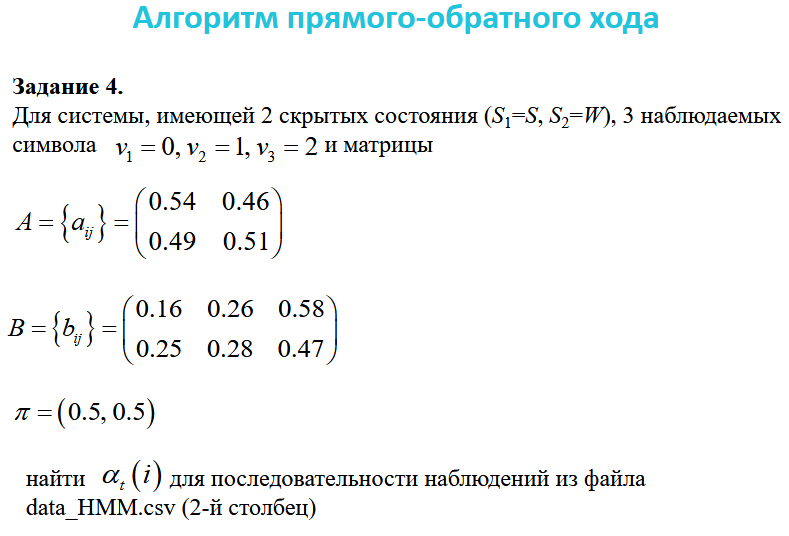

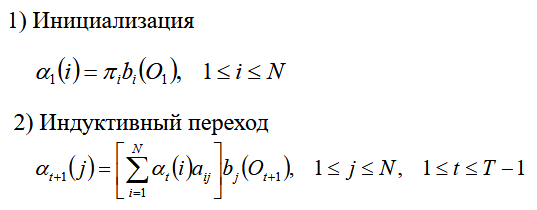

In [154]:
def forward(obs, A, B, pi):
    T = len(obs)
    N = len(A)
    alpha = np.zeros((T, N))

    # инициализация
    alpha[0] = pi * B[:, obs[0]]

    # индуктивный переход
    for t in range(1, T):
        alpha[t] = (alpha[t-1] @ A) * B[:, obs[t]]

    return alpha

In [155]:
A = np.array([[0.54, 0.46], [0.49, 0.51]])
B = np.array([[0.16, 0.26, 0.58], [0.25, 0.28, 0.47]])
pi = np.array([0.5, 0.5])

alpha = forward(observations, A, B, pi)
print(alpha[:10])

[[0.08       0.125     ]
 [0.027157   0.028154  ]
 [0.01650694 0.01261986]
 [0.00875654 0.00659378]
 [0.0046165  0.00347369]
 [0.00243311 0.00183073]
 [0.00128234 0.00096486]
 [0.00067584 0.00050852]
 [0.0003562  0.00026801]
 [0.00018773 0.00014125]]


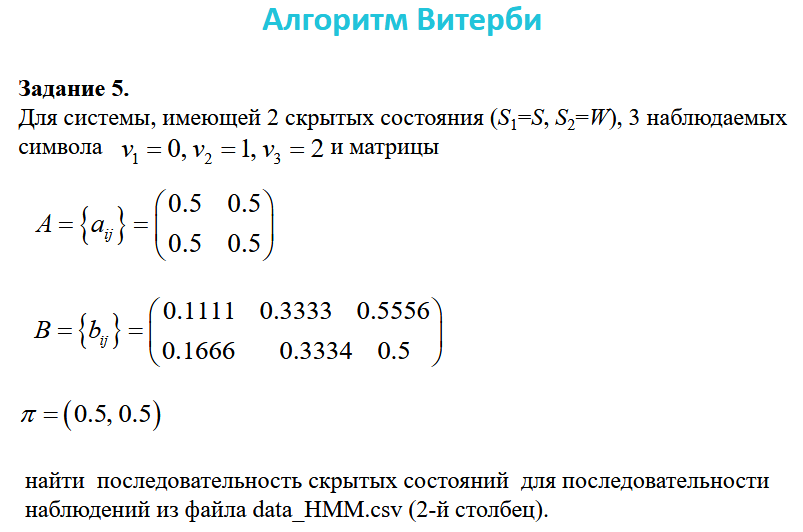

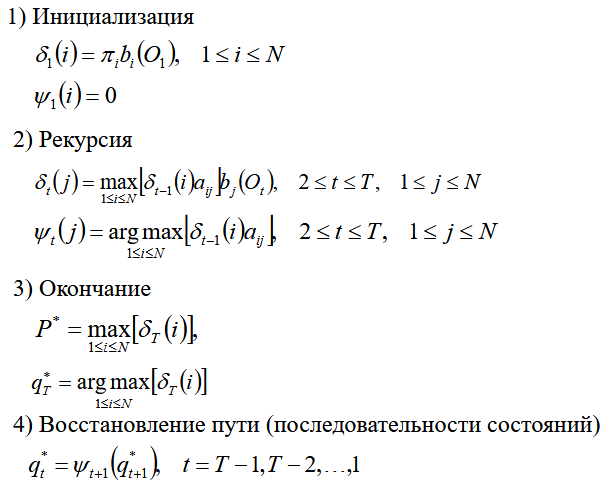

In [156]:
def viterbi(obs, A, B, pi):
    T = len(obs)
    N = len(A)
    delta = np.zeros((T, N))
    psi = np.zeros((T, N), dtype=int)
    path = np.zeros(T, dtype=int)

    # инициализация
    delta[0] = pi * B[:, obs[0]]

    # рекурсия
    for t in range(1, T):
        probs = delta[t-1][:, None] * A
        psi[t] = np.argmax(probs, axis=0)
        delta[t] = np.max(probs, axis=0) * B[:, obs[t]]

    # окончание
    path[T-1] = np.argmax(delta[T-1])

    # восстановление пути
    for t in range(T-2, -1, -1):
        path[t] = psi[t+1, path[t+1]]

    state_names = np.array(['S', 'W'])
    decoded_path = state_names[path]
    psi_symbols = state_names[psi]

    return decoded_path, delta, psi_symbols

In [157]:
A = np.array([[0.5, 0.5], [0.5, 0.5]])
B = np.array([[0.1111, 0.3333, 0.5556], [0.1666, 0.3334, 0.5]])
pi = np.array([0.5, 0.5])

path, delta, psi = viterbi(observations, A, B, pi)
print(delta[:5])
print(psi[:5])
print(path[:5])

[[0.05555    0.0833    ]
 [0.01388194 0.01388611]
 [0.00385756 0.00347153]
 [0.00107163 0.00096439]
 [0.0002977  0.00026791]]
[['S' 'S']
 ['W' 'W']
 ['W' 'W']
 ['S' 'S']
 ['S' 'S']]
['W' 'W' 'S' 'S' 'S']


In [158]:
print(np.mean(path == hidden))

0.63


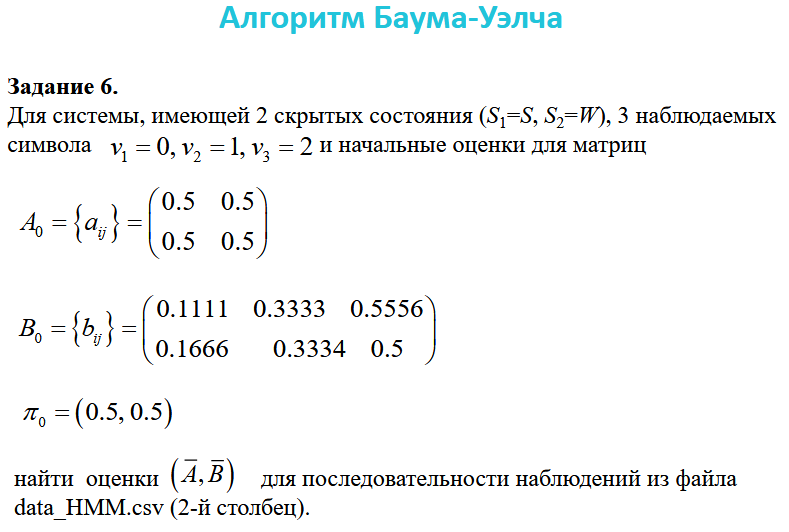

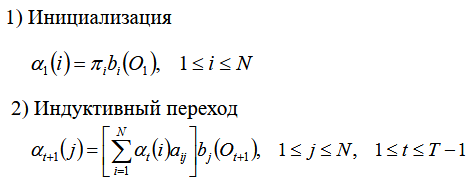

In [159]:
def forward(obs, A, B, pi):
    T = len(obs)
    N = len(A)
    alpha = np.zeros((T, N))

    alpha[0] = pi * B[:, obs[0]]

    for t in range(1, T):
        alpha[t] = (alpha[t-1] @ A) * B[:, obs[t]]

    return alpha

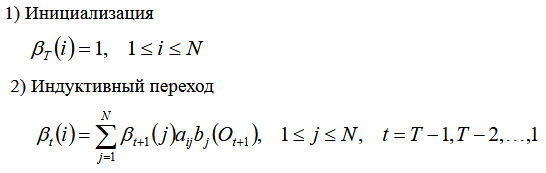

In [160]:
def backward(obs, A, B):
    T = len(obs)
    N = len(A)
    beta = np.zeros((T, N))

    beta[T-1] = 1

    for t in range(T-2, -1, -1):
        beta[t] = (A * (B[:, obs[t+1]] * beta[t+1])).sum(axis=1)

    return beta

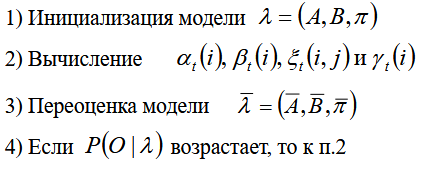

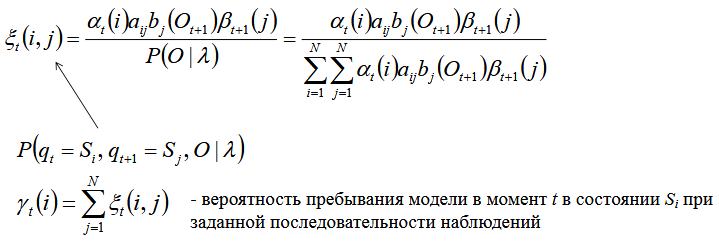

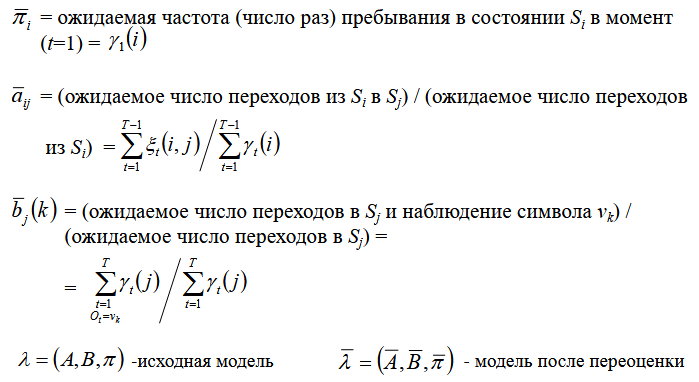

In [161]:
def baum_welch(obs, A, B, pi, n_iter=1000, tol=1e-10):
    # инициализация модели
    N = A.shape[0]
    M = B.shape[1]
    T = len(obs)
    xi = np.zeros((T-1, N, N))
    gamma = np.zeros((T, N))
    B_new = np.zeros_like(B)
    prev_log_prob = None

    for n in range(n_iter):
        # вычисление
        alpha = forward(obs, A, B, pi)
        beta = backward(obs, A, B)

        xi.fill(0)
        gamma.fill(0)
        B_new.fill(0)

        for t in range(T-1):
            numer = (alpha[t][:, np.newaxis] * A) * (B[:, obs[t+1]] * beta[t+1])
            denom = np.sum(numer)
            xi[t] = numer / denom
            gamma[t] = np.sum(xi[t], axis=1)

        gamma[T-1] = alpha[T-1] * beta[T-1] / np.sum(alpha[T-1] * beta[T-1])

        # переоценка модели
        A = np.sum(xi, axis=0) / np.sum(gamma[:-1], axis=0)[:, None]

        for k in range(M):
            mask = (obs == k)
            B_new[:, k] = np.sum(gamma[mask], axis=0) / np.sum(gamma, axis=0)
        B = B_new.copy()

        # проверка сходимости
        log_prob = np.log(np.sum(alpha[-1]))
        if prev_log_prob is not None and abs(log_prob - prev_log_prob) < tol:
            break
        prev_log_prob = log_prob

    return A, B

In [162]:
A_0 = np.array([[0.5, 0.5], [0.5, 0.5]])
B_0 = np.array([[0.1111, 0.3333, 0.5556], [0.1666, 0.3334, 0.5]])
pi_0 = np.array([0.5, 0.5])

A, B = baum_welch(observations, A_0, B_0, pi_0)
print(f"A:\n {A}")
print(f"B:\n {B}")

A:
 [[0.90088661 0.09911339]
 [0.0754999  0.9245001 ]]
B:
 [[0.10162083 0.17476779 0.72361139]
 [0.28544698 0.34248488 0.37206815]]
